In [1]:
import os
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
import scipy

In [158]:
qvi_purchase = pd.read_csv("QVI_purchase_behaviour.csv")
qvi_transaction = pd.read_excel("QVI_transaction_data.xlsx")

Examine transaction data – look for inconsistencies, missing data across the data set, outliers, correctly identified category items, numeric data across all tables. If you determine any anomalies make the necessary changes in the dataset and save it. Having clean data will help when it comes to your analysis. 

Examine customer data – check for similar issues in the customer data, look for nulls and when you are happy merge the transaction and customer data together so it’s ready for the analysis ensuring you save your files along the way.

Data analysis and customer segments – in your analysis make sure you define the metrics – look at total sales, drivers of sales, where the highest sales are coming from etc. Explore the data, create charts and graphs as well as noting any interesting trends and/or insights you find. These will all form part of our report to Julia. 

Deep dive into customer segments – define your recommendation from your insights, determine which segments we should be targeting, if packet sizes are relative and form an overall conclusion based on your analysis. 

Make sure you save your analysis in the CSV files and your visualisations – we will need them for our report. If you could work on this analysis and send me your initial findings by end of next week that would be great.  

In [159]:
qvi_purchase

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [160]:
qvi_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [161]:
qvi_transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [162]:
qvi_transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [163]:
#can see that the max values for product quantity and total sales is much larger than mean

In [172]:
#check data types
qvi_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [171]:
#change date to appropriate format
qvi_transaction['DATE'] = pd.to_datetime(qvi_transaction['DATE'], origin='1899-12-30', unit='D')

TypeError: 'DataFrame' object is not callable

In [173]:
#check for null values
qvi_purchase.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [174]:
qvi_transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [175]:
qvi_transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [176]:
qvi_transaction.max()

DATE                         2019-06-30 00:00:00
STORE_NBR                                    272
LYLTY_CARD_NBR                           2373711
TXN_ID                                   2415841
PROD_NBR                                     114
PROD_NAME         Woolworths Mild     Salsa 300g
PROD_QTY                                     200
TOT_SALES                                  650.0
dtype: object

In [177]:
prod_qty_max_val = qvi_transaction['PROD_QTY'].idxmax()

In [178]:
qvi_transaction = qvi_transaction.drop(index=prod_qty_max_val)

### visualise outliers

In [5]:
from scipy import stats
columns = qvi_transaction[['PROD_QTY', 'TOT_SALES']]
boxplot = sns.boxplot(data=columns, orient="h", palette="Set2")

NameError: name 'qvi_transaction' is not defined

looks to be 2 clear outliers. Suggest removing both

In [ ]:
#remove outliers, starting with product quantity
qvi_transaction.max()


DATE                         2019-06-30 00:00:00
STORE_NBR                                    272
LYLTY_CARD_NBR                           2373711
TXN_ID                                   2415841
PROD_NBR                                     114
PROD_NAME         Woolworths Mild     Salsa 300g
PROD_QTY                                     200
TOT_SALES                                  650.0
dtype: object

In [ ]:
prod_qty_max_val = qvi_transaction['PROD_QTY'].idxmax()

In [ ]:
qvi_transaction = qvi_transaction.drop(index=prod_qty_max_val)
qvi_transaction.max()

DATE                         2019-06-30 00:00:00
STORE_NBR                                    272
LYLTY_CARD_NBR                           2373711
TXN_ID                                   2415841
PROD_NBR                                     114
PROD_NAME         Woolworths Mild     Salsa 300g
PROD_QTY                                       5
TOT_SALES                                   29.5
dtype: object

In [ ]:
#still another outlier to remove
prod_qty_max_val = qvi_transaction['PROD_QTY'].idxmax()
qvi_transaction = qvi_transaction.drop(index=prod_qty_max_val)
qvi_transaction.max()

DATE                         2019-06-30 00:00:00
STORE_NBR                                    272
LYLTY_CARD_NBR                           2373711
TXN_ID                                   2415841
PROD_NBR                                     114
PROD_NAME         Woolworths Mild     Salsa 300g
PROD_QTY                                       5
TOT_SALES                                   29.5
dtype: object

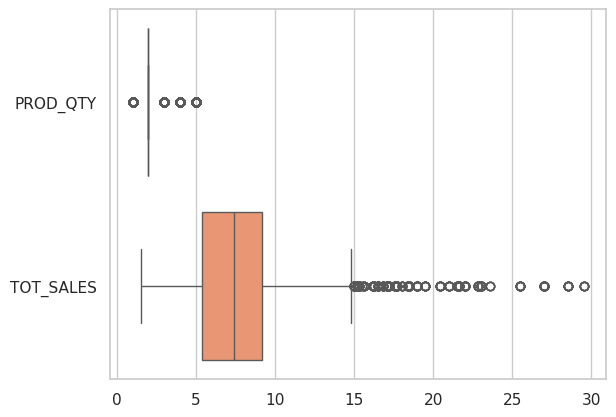

In [ ]:
columns = qvi_transaction[['PROD_QTY', 'TOT_SALES']]
boxplot = sns.boxplot(data=columns, orient="h", palette="Set2")

These don't look to be anomolies/errors so keeping data

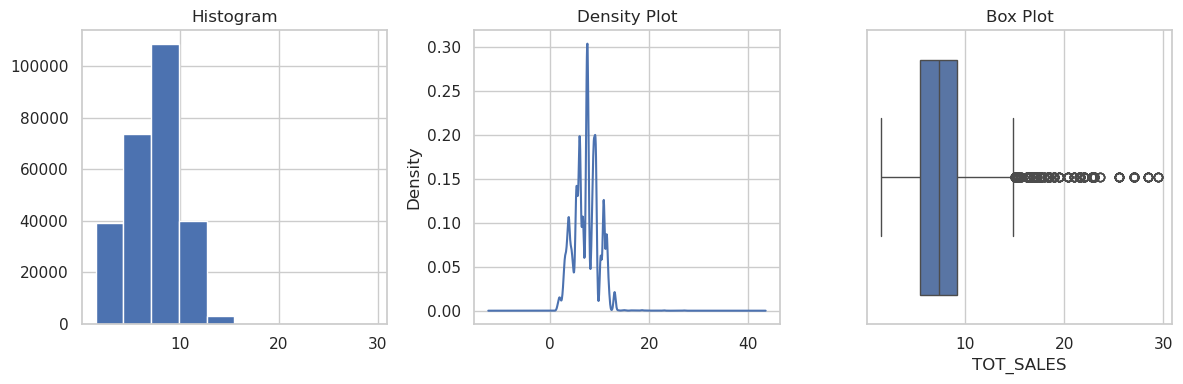

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Histogram
plt.figure(figsize=(12,4))
plt.subplot(131)
qvi_transaction['TOT_SALES'].hist()
plt.title('Histogram')

# Density Plot
plt.subplot(132)
qvi_transaction['TOT_SALES'].plot.density()
plt.title('Density Plot')

# Box Plot
plt.subplot(133)
sns.boxplot(x=qvi_transaction['TOT_SALES'])
plt.title('Box Plot')

plt.tight_layout()
plt.show()

In [ ]:
looks to be slightly right skewed, density plot has multiple peaks

In [ ]:
z_scores = np.abs(stats.zscore(columns))

outliers = (z_scores > 3).any(axis=1)

print("Number of outliers:", outliers.sum())
print("\nOutlier Rows:")
print(columns[outliers])

outlier_percentage = (outliers.sum() / len(columns)) * 100
print(f"\nOutlier Percentage: {outlier_percentage:.2f}%")

Number of outliers: 1276

Outlier Rows:
        PROD_QTY  TOT_SALES
1              3        6.3
4              3       13.8
11             5       23.0
16             4        9.2
31             4       14.8
...          ...        ...
258745         3        9.0
258759         4       13.2
258770         3        9.0
258782         3        5.1
258788         5       18.5

[1276 rows x 2 columns]

Outlier Percentage: 0.48%


In [ ]:
merged_df = pd.merge(qvi_transaction, qvi_purchase, on='LYLTY_CARD_NBR')

In [ ]:
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


check if any dates missing

In [ ]:
merged_df.DATE.nunique()

364

missing 1 date

In [ ]:
#add missing date
start_date = pd.Timestamp('2018-07-01')
end_date = pd.Timestamp('2019-06-30')
date_range = pd.date_range(start=start_date, end=end_date)
missing_dates = date_range[~date_range.isin(merged_df['DATE'])]
print(missing_dates)

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')


check to see that product name and number have same number of unique items

In [ ]:
p_names = merged_df.PROD_NAME.nunique()
p_numbers = merged_df.PROD_NBR.nunique()

print(f"There are {p_names} unique product names {p_numbers} unique product numbers") 

There are 114 unique product names 114 unique product numbers


In [ ]:
# Replace occurrences of 'chp' or 'chps' with 'chips'
merged_df['PROD_NAME'] = merged_df['PROD_NAME'].str.replace(r'\bchp(s)?\b', 'chips', case=False, regex=True)

In [ ]:
merged_df.PROD_NAME.unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g', 'WW Original Stacked Chips 160g',
       'CCs Original 175g', 'Smiths Crinkle Cut  Chips Chicken 170g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Tyrrells Crisps     Lightly Salted 165g',
       'Kettle Tortilla ChpsFeta&Garlic 150g',
       'Dorito Corn chips     Supreme 380g', 'Doritos Mexicana    170g',
       'Smiths Crinkle Chips Salt & Vinegar 330g', 'Kettle Original 175g',
       'Tyrrells Crisps     Ched & Chives 165g',
       'Infuzions BBQ Rib   Prawn Crackers 110g',
       'Grain Waves         Sweet Chilli 210g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Thins Potato Chips  Hot & Spicy 175g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Red Rock Deli Thai  Chilli&Lime 150g',
       'GrnWves Plus Btroot & Chilli Jam 180g',
       'WW D/Style Chip   

In [ ]:
# Define words to check for in the PROD_NAME column
words_to_exclude = ['dip', 'crackers', 'grain waves', 'GrnWves', 'Twisties', 'Infzns', 'Cheezels', 'Salsa', 'Infuzions',
                   'Balls', 'corn', 'pringle', 'CC', 'tortilla', 'dorito', 'tostito', 'ring', 'cobs', 'cheeto']

# Create a pattern to exclude the specified words
pattern = '|'.join(words_to_exclude)

# Remove rows that contain specific words in the PROD_NAME column
filtered_df = merged_df[~merged_df['PROD_NAME'].str.contains(pattern, case=False, na=False)]

# print("\nDataFrame After Removing Rows with Specified Words in 'PROD_NAME':")
# print(filtered_df)

In [ ]:
filtered_df.PROD_NAME.nunique()

56

In [ ]:
filtered_df.PROD_NAME.unique()

array(['Natural Chip        Compny SeaSalt175g',
       'WW Original Stacked Chips 160g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Tyrrells Crisps     Lightly Salted 165g',
       'Smiths Crinkle Chips Salt & Vinegar 330g', 'Kettle Original 175g',
       'Tyrrells Crisps     Ched & Chives 165g',
       'Thins Potato Chips  Hot & Spicy 175g',
       'Red Rock Deli Thai  Chilli&Lime 150g',
       'WW D/Style Chip     Sea Salt 200g',
       'Thins Chips Light&  Tangy 175g',
       'Kettle Sensations   Siracha Lime 150g',
       'Thins Chips Salt &  Vinegar 175g',
       'WW Crinkle Cut      Chicken 175g',
       'RRD Sweet Chilli &  Sour Cream 165g', 'RRD Salt & Vinegar  165g',
       'Smiths Crinkle      Original 330g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Red Rock Deli Chikn&Garlic Aioli 150g',
       'RRD SR Slow Rst     Pork Belly 150g',
       'Natural ChipCo Sea  Salt & Vinegr 175g',
       'Smith Crinkle Cut   Bolognese 150g',
       'WW Sour Cream

In [ ]:
#remove special characters
filtered_df['PROD_NAME'] = filtered_df['PROD_NAME'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)


/tmp/ipykernel_3010/1075078876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['PROD_NAME'] = filtered_df['PROD_NAME'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)


In [ ]:
filtered_df = filtered_df.sort_values(by='TOT_SALES')

In [ ]:
filtered_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
18433,2018-09-15,2,2022,611,92,WW Crinkle Cut Chicken 175g,1,1.7,MIDAGE SINGLES/COUPLES,Premium
50000,2019-03-10,186,186251,188646,55,Snbts Whlgrn Crisps CheddrMstrd 90g,1,1.7,OLDER FAMILIES,Budget
164671,2019-03-18,163,163439,163728,92,WW Crinkle Cut Chicken 175g,1,1.7,RETIREES,Mainstream
50008,2019-03-24,186,186320,188702,72,WW Crinkle Cut Original 175g,1,1.7,OLDER FAMILIES,Budget
259750,2018-09-03,16,16484,14594,72,WW Crinkle Cut Original 175g,1,1.7,YOUNG SINGLES/COUPLES,Premium
...,...,...,...,...,...,...,...,...,...,...
171911,2018-08-17,24,24095,20797,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,RETIREES,Premium
5744,2018-08-15,94,94148,93390,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,MIDAGE SINGLES/COUPLES,Mainstream
119729,2019-05-19,194,194308,194516,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,OLDER SINGLES/COUPLES,Premium
151904,2019-05-20,118,118021,120799,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,RETIREES,Mainstream


In [ ]:
#chip sales per year by type
# Grouping by product_name and summing the sales
total_sales_year = filtered_df.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()

# Renaming the column for clarity
total_sales_year.rename(columns={'TOT_SALES': 'total_sales'}, inplace=True)

total_sales_year = total_sales_year.sort_values(by='total_sales')

In [ ]:
#add new column: transactions per date
transaction_counts = filtered_df.groupby('DATE').size().reset_index(name='TRANS_PER_DATE')
filtered_df = filtered_df.merge(transaction_counts, on='DATE', how='left')

/tmp/ipykernel_3010/2320391939.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales', y='PROD_NAME', data=total_sales_year, palette='viridis')


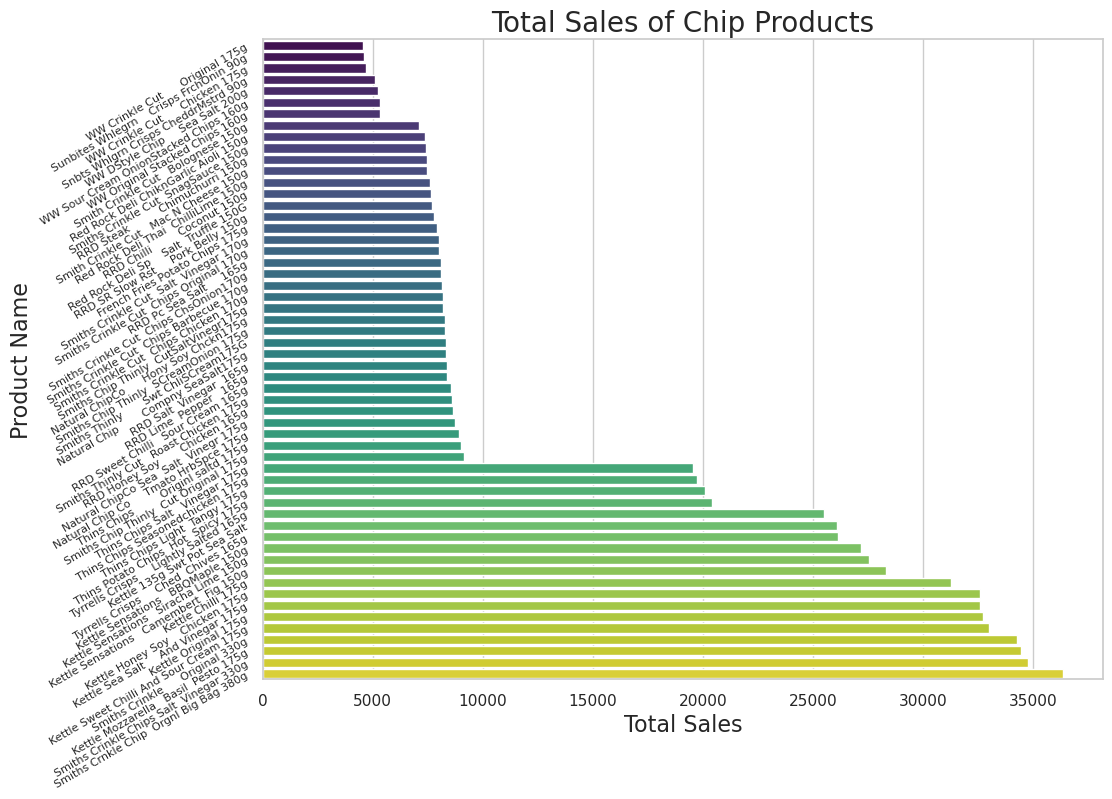

In [ ]:

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Create a larger figure for better readability
plt.figure(figsize=(12, 8))  # Increased figure size
sns.barplot(x='total_sales', y='PROD_NAME', data=total_sales_year, palette='viridis')

# Adding title and labels
plt.title('Total Sales of Chip Products', fontsize=20)  # Larger title font size
plt.xlabel('Total Sales', fontsize=16)  # Larger x-label font size
plt.ylabel('Product Name', fontsize=16)  # Larger y-label font size

# Adjusting the y-axis for better readability
plt.yticks(rotation=30, ha='right', fontsize=8)  # Rotate y-axis labels and align to the right
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)  # Add space around the plot

# Show the plot
plt.show()

In [ ]:
filtered_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,WW
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths
7,2018-08-06,4,4074,2978,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,MIDAGE SINGLES/COUPLES,Budget,Tyrrells
11,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,MIDAGE SINGLES/COUPLES,Budget,Smiths
...,...,...,...,...,...,...,...,...,...,...,...
264817,2019-06-17,271,271193,269367,95,Sunbites Whlegrn Crisps Frch/Onin 90g,2,3.4,YOUNG SINGLES/COUPLES,Premium,Sunbites
264819,2019-06-15,272,272053,269703,46,Kettle Original 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium,Kettle
264821,2019-03-17,272,272156,269855,63,Kettle 135g Swt Pot Sea Salt,2,8.4,YOUNG SINGLES/COUPLES,Premium,Kettle
264827,2018-11-12,272,272319,270087,44,Thins Chips Light& Tangy 175g,2,6.6,YOUNG SINGLES/COUPLES,Premium,Thins


In [ ]:
#getting packet size and plot sales by pack size
#first, add pack size to new column
filtered_df['PACK_SIZE'] = filtered_df['PROD_NAME'].str.extract('(\d+)')

In [ ]:
#get brand name from product name
filtered_df['BRAND_NAME'] = filtered_df['PROD_NAME'].str.split().str[0]
#convert to dataframe

KeyError: "None of [Index(['BRAND_NAME'], dtype='object')] are in the [index]"

In [ ]:
#rename Red to RRD as same brand
filtered_df.loc[filtered_df['BRAND_NAME'] == 'Red', 'BRAND_NAME'] = 'RRD'
filtered_df.loc[filtered_df['BRAND_NAME'] == 'Snbts', 'BRAND_NAME'] = 'Sunbites'

In [ ]:
filtered_df['BRAND_NAME'].unique()

array(['Natural', 'WW', 'Smiths', 'Tyrrells', 'Kettle', 'Thins', 'RRD',
       'Smith', 'French', 'Sunbites'], dtype=object)

In [ ]:
#get different pack sizes
filtered_df.PACK_SIZE.unique()

array(['175', '90', '200', '160', '150', '170', '165', '135', '330',
       '380'], dtype=object)

/tmp/ipykernel_3010/3441863571.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PACK_SIZE', y='TOT_SALES', data=sales_by_pack_size, palette='viridis')


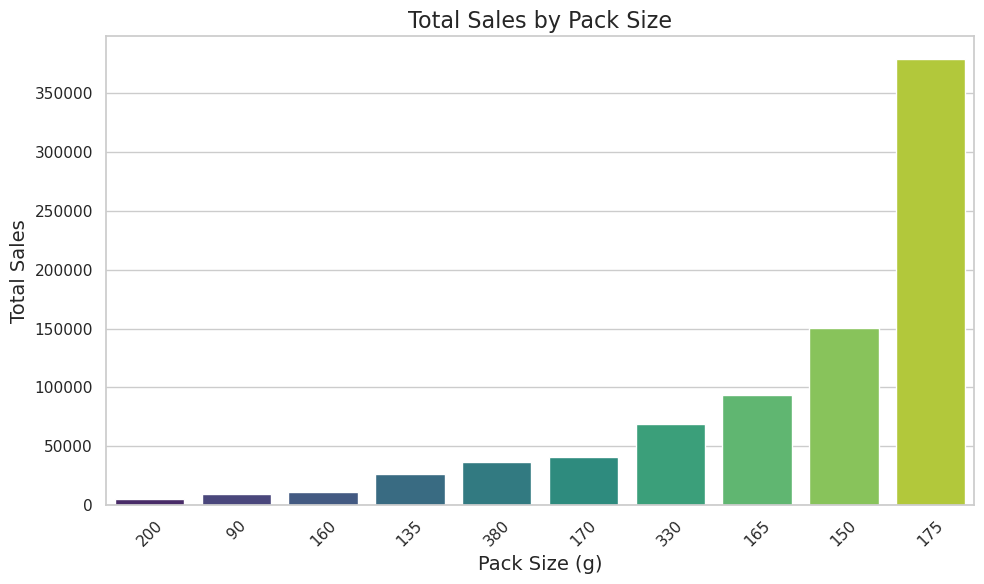

In [ ]:
sales_by_pack_size = filtered_df.groupby('PACK_SIZE')['TOT_SALES'].sum().reset_index()
# Sort by PACK_SIZE (optional)
sales_by_pack_size = sales_by_pack_size.sort_values(by='TOT_SALES')
# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Create a bar plot for sales by pack size
plt.figure(figsize=(10, 6))
sns.barplot(x='PACK_SIZE', y='TOT_SALES', data=sales_by_pack_size, palette='viridis')

# Adding title and labels
plt.title('Total Sales by Pack Size', fontsize=16)
plt.xlabel('Pack Size (g)', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()

In [ ]:
#total_sales_year = filtered_df.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()
weekly_sales = filtered_df.set_index('DATE').resample('W').sum().reset_index()

/tmp/ipykernel_3010/2659649578.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DATE', y='TOT_SALES', data=weekly_sales, palette='viridis')


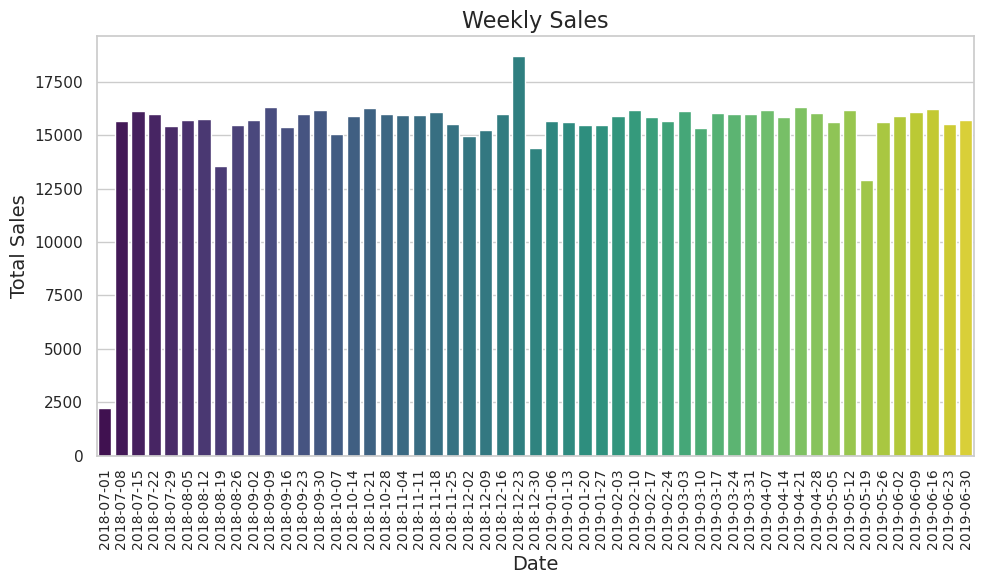

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='DATE', y='TOT_SALES', data=weekly_sales, palette='viridis')

# Adding title and labels
plt.title('Weekly Sales', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize= 10)

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

In [ ]:
dec_sales_start = '2018-12-01'
dec_sales_end = '2018-12-31'
december_df = filtered_df[(filtered_df['DATE'] >= dec_sales_start) & (filtered_df['DATE'] <= dec_sales_end)]
daily_sales = december_df.set_index('DATE').resample('D').sum().reset_index()

/tmp/ipykernel_3010/3482155985.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DATE', y='TRANS_PER_DATE', data=daily_sales, palette='viridis')


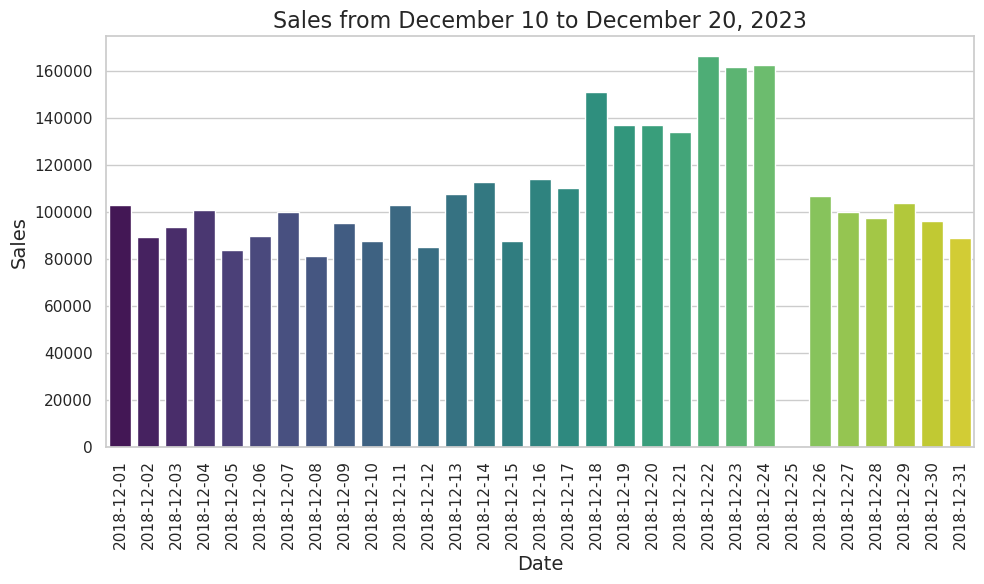

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Create a bar plot for the filtered date range
plt.figure(figsize=(10, 6))
sns.barplot(x='DATE', y='TRANS_PER_DATE', data=daily_sales, palette='viridis')

# Adding title and labels
plt.title('Sales from December 10 to December 20, 2023', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

highest sales in lead up to Christmas and Christmas is a public holiday. Likewise there's a drop in sales near Easter (Easter Sunday 21/05) likely because of public holidays and tradition of buying chocolate
The first week of financial new year looks to be a very low time of spending

In [ ]:
grouped_sales = filtered_df.groupby('BRAND_NAME')['TOT_SALES'].sum().reset_index()

/tmp/ipykernel_3010/2986747986.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BRAND_NAME', y='TOT_SALES', data=grouped_sales, palette='viridis')


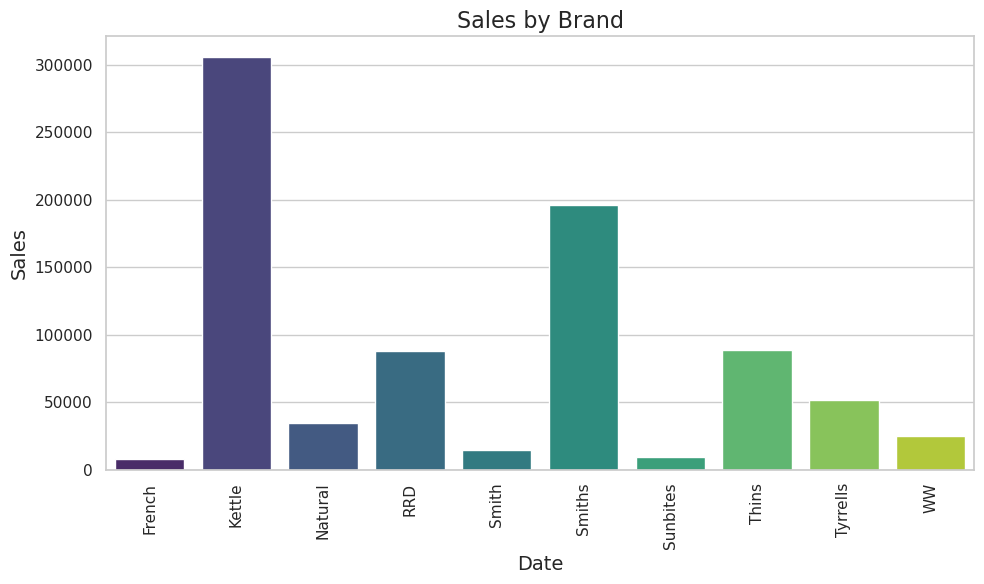

In [ ]:
sns.set(style='whitegrid')

# Create a bar plot for the filtered date range
plt.figure(figsize=(10, 6))
sns.barplot(x='BRAND_NAME', y='TOT_SALES', data=grouped_sales, palette='viridis')

# Adding title and labels
plt.title('Sales by Brand', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

Kettle and Smiths most popular brands

In [ ]:

total_sales=filtered_df[['LIFESTAGE','PREMIUM_CUSTOMER','TOT_SALES']].groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).sum()
# a.sort_values('TOT_SALES',ascending=False)
lifestage = filtered_df.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index()
lifestage_customers = filtered_df.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['LYLTY_CARD_NBR'].sum().reset_index()

#to get sales by lifestage
sales_by_lifestage = filtered_df.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['TOT_SALES'].sum().reset_index()
sales_by_lifestage.rename(columns={'TOT_SALES': 'LIFESTAGE_SALES'}, inplace=True)
filtered_df = filtered_df.merge(sales_by_lifestage, on=['PREMIUM_CUSTOMER', 'LIFESTAGE'], how='left')

total_sales_by_lifestyle_and_customer = filtered_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

#### Sales by Customer Type and Lifestyle

In [ ]:
total_sales_by_customer = filtered_df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().reset_index()


print("Total Sales by Premium Customer:")
print(total_sales_by_customer)

Total Sales by Premium Customer:
  PREMIUM_CUSTOMER  TOT_SALES
0           Budget   290608.7
1       Mainstream   313926.2
2          Premium   216833.2


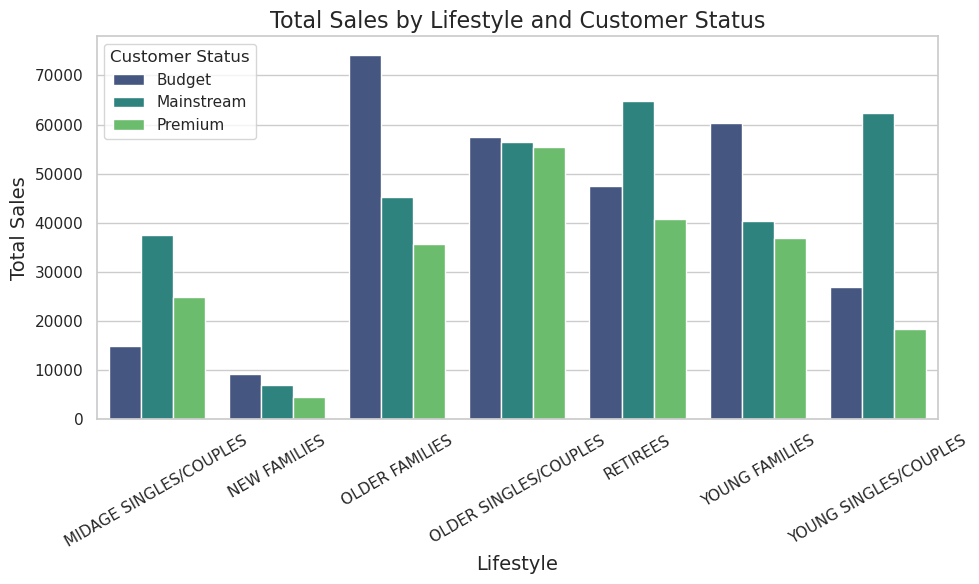

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=total_sales_by_lifestyle_and_customer, 
            x='LIFESTAGE', 
            y='TOT_SALES', 
            hue='PREMIUM_CUSTOMER', 
            palette='viridis')

plt.title('Total Sales by Lifestyle and Customer Status', fontsize=16)
plt.xlabel('Lifestyle', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.legend(title='Customer Status')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

older families on a budget and mainstream older and younger singles/couples spent the most on chips (as a total)

In [ ]:
# Calculate total sales by LIFESTAGE
total_sales_by_lifestyle = filtered_df.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index()

# Display the results
print("Total Sales by Lifestyle:")
print(total_sales_by_lifestyle)

Total Sales by Lifestyle:
                LIFESTAGE  TOT_SALES
0  MIDAGE SINGLES/COUPLES    77511.3
1            NEW FAMILIES    20745.9
2          OLDER FAMILIES   155277.0
3   OLDER SINGLES/COUPLES   169299.3
4                RETIREES   152981.7
5          YOUNG FAMILIES   137818.7
6   YOUNG SINGLES/COUPLES   107734.2


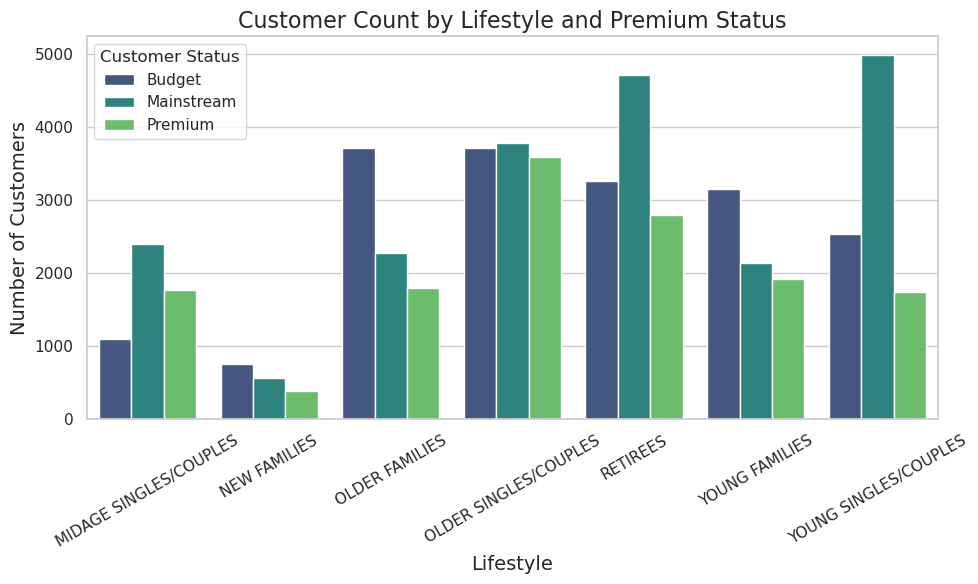

In [ ]:
# Melt the DataFrame for use with seaborn
# Group by LIFESTAGE and PREMIUM_CUSTOMER, then count unique customers
breakdown = filtered_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().unstack(fill_value=0)

# Reset index for visualization
breakdown = breakdown.reset_index()

# Melt the DataFrame for use with seaborn
melted_breakdown = breakdown.melt(id_vars='LIFESTAGE', var_name='Customer Status', value_name='Count')

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_breakdown, x='LIFESTAGE', y='Count', hue='Customer Status', palette='viridis')
plt.title('Customer Count by Lifestyle and Premium Status', fontsize=16)
plt.xlabel('Lifestyle', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.legend(title='Customer Status')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

there's more mainstream young singles/couples than any other group

In [ ]:
breakdown = filtered_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().unstack(fill_value=0)

# Fill NaN with 0 for better readability if applicable
breakdown = breakdown.fillna(0).astype(int)

# Display the result
print(breakdown)

PREMIUM_CUSTOMER        Budget  Mainstream  Premium
LIFESTAGE                                          
MIDAGE SINGLES/COUPLES    1105        2401     1777
NEW FAMILIES               755         567      394
OLDER FAMILIES            3712        2279     1797
OLDER SINGLES/COUPLES     3710        3784     3588
RETIREES                  3260        4718     2802
YOUNG FAMILIES            3150        2147     1921
YOUNG SINGLES/COUPLES     2538        4994     1747


In [ ]:
filtered_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND_NAME,LIFESTAGE_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural,18370.1
1,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,WW,14992.2
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths,14992.2
3,2018-08-06,4,4074,2978,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,MIDAGE SINGLES/COUPLES,Budget,Tyrrells,14992.2
4,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,MIDAGE SINGLES/COUPLES,Budget,Smiths,14992.2


In [ ]:
# Number of Customers in Each Segment
customer_counts = filtered_df.groupby('LIFESTAGE')['LYLTY_CARD_NBR'].nunique().reset_index()
customer_counts.rename(columns={'LYLTY_CARD_NBR': 'Customer Count'}, inplace=True)
print("\nNumber of Customers in Each Segment:")
print(customer_counts)


Number of Customers in Each Segment:
                LIFESTAGE  Customer Count
0  MIDAGE SINGLES/COUPLES            5283
1            NEW FAMILIES            1716
2          OLDER FAMILIES            7788
3   OLDER SINGLES/COUPLES           11082
4                RETIREES           10780
5          YOUNG FAMILIES            7218
6   YOUNG SINGLES/COUPLES            9279


In [ ]:
# Average Chips Bought per Customer by Segment
chips_per_customer = filtered_df.groupby(['LIFESTAGE', 'PROD_QTY'])['TOT_SALES'].sum().reset_index()
average_chips = chips_per_customer.groupby('LIFESTAGE')['PROD_QTY'].mean().reset_index()
average_chips.rename(columns={'QUANTITY': 'Average Chips per Customer'}, inplace=True)
print("\nAverage Chips Bought per Customer by Segment:")
print(average_chips)


Average Chips Bought per Customer by Segment:
                LIFESTAGE  PROD_QTY
0  MIDAGE SINGLES/COUPLES      3.00
1            NEW FAMILIES      2.75
2          OLDER FAMILIES      3.00
3   OLDER SINGLES/COUPLES      3.00
4                RETIREES      3.00
5          YOUNG FAMILIES      3.00
6   YOUNG SINGLES/COUPLES      3.00


### How much customers spend on chips

In [ ]:

# Group by LIFESTAGE and PREMIUM_CUSTOMER to calculate average price
avg_price = filtered_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].mean().reset_index()

# Display the result
print(avg_price)

                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
0   MIDAGE SINGLES/COUPLES           Budget   6.820837
1   MIDAGE SINGLES/COUPLES       Mainstream   7.614777
2   MIDAGE SINGLES/COUPLES          Premium   6.926871
3             NEW FAMILIES           Budget   7.134756
4             NEW FAMILIES       Mainstream   7.031237
5             NEW FAMILIES          Premium   7.190654
6           OLDER FAMILIES           Budget   7.053202
7           OLDER FAMILIES       Mainstream   7.053741
8           OLDER FAMILIES          Premium   6.989154
9    OLDER SINGLES/COUPLES           Budget   7.323967
10   OLDER SINGLES/COUPLES       Mainstream   7.104474
11   OLDER SINGLES/COUPLES          Premium   7.309112
12                RETIREES           Budget   7.303525
13                RETIREES       Mainstream   7.056813
14                RETIREES          Premium   7.355497
15          YOUNG FAMILIES           Budget   7.067377
16          YOUNG FAMILIES       Mainstream   6.985423
17        

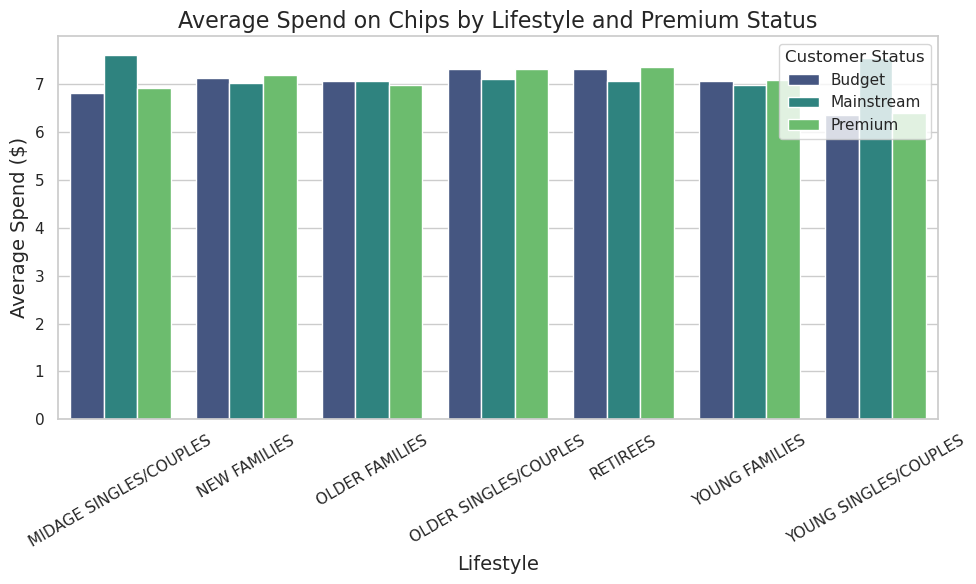

In [370]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', palette='viridis')
plt.title('Average Spend on Chips by Lifestyle and Premium Status', fontsize=16)
plt.xlabel('Lifestyle', fontsize=14)
plt.ylabel('Average Spend ($)', fontsize=14)
plt.legend(title='Customer Status')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

mainstream middle aged singles/couples and mainstream young singles/couples spend the most on chips, on average

### How many purchases per customer

In [ ]:
customer_purchase = filtered_df.groupby(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index()

average_units_per_segment = customer_purchase.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()


average_units_per_segment.rename(columns={'PROD_QTY': 'AVERAGE_UNITS_PURCHASED'}, inplace=True)

print(average_units_per_segment)

                 LIFESTAGE PREMIUM_CUSTOMER  AVERAGE_UNITS_PURCHASED
0   MIDAGE SINGLES/COUPLES           Budget                 3.733937
1   MIDAGE SINGLES/COUPLES       Mainstream                 3.930446
2   MIDAGE SINGLES/COUPLES          Premium                 3.810917
3             NEW FAMILIES           Budget                 3.143046
4             NEW FAMILIES       Mainstream                 3.171076
5             NEW FAMILIES          Premium                 2.992386
6           OLDER FAMILIES           Budget                 5.515356
7           OLDER FAMILIES       Mainstream                 5.495832
8           OLDER FAMILIES          Premium                 5.525320
9    OLDER SINGLES/COUPLES           Budget                 4.043935
10   OLDER SINGLES/COUPLES       Mainstream                 4.000000
11   OLDER SINGLES/COUPLES          Premium                 4.051839
12                RETIREES           Budget                 3.759509
13                RETIREES       M

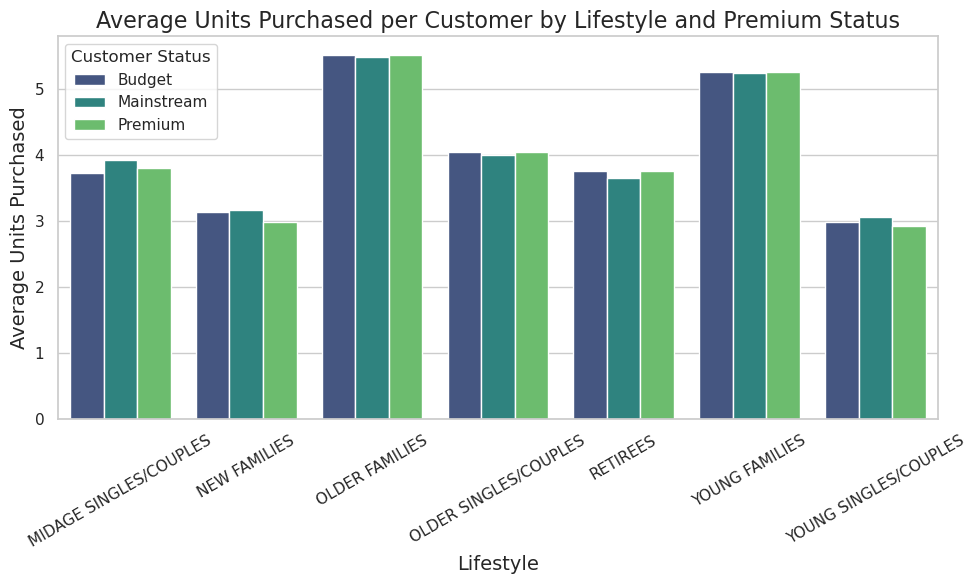

In [330]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=average_units_per_segment, x='LIFESTAGE', y='AVERAGE_UNITS_PURCHASED', hue='PREMIUM_CUSTOMER', palette='viridis')
plt.title('Average Units Purchased per Customer by Lifestyle and Premium Status', fontsize=16)
plt.xlabel('Lifestyle', fontsize=14)
plt.ylabel('Average Units Purchased', fontsize=14)
plt.legend(title='Customer Status')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

older and younger families have bought the most chips, on average

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


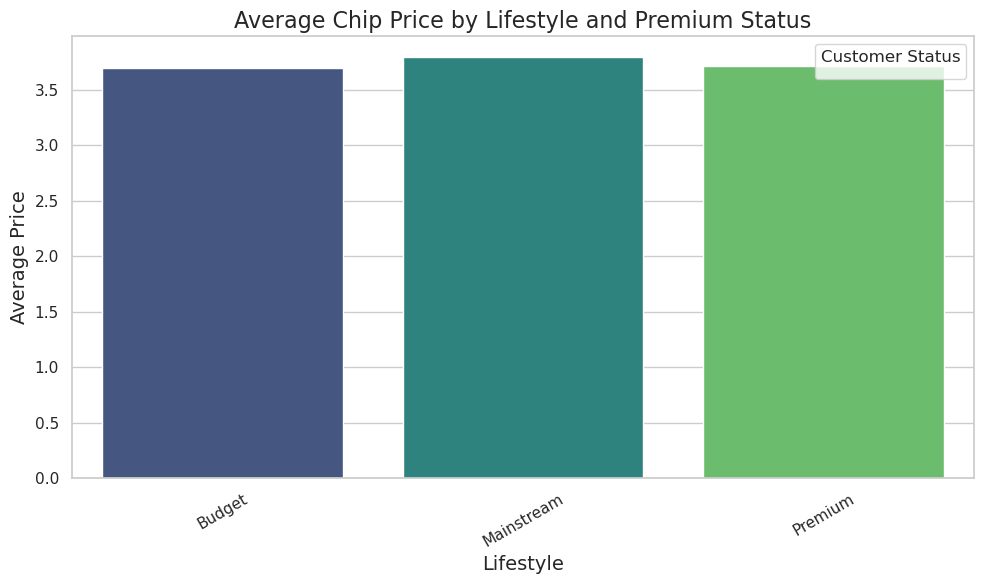

In [350]:
premium_customer_spend = filtered_df.groupby(['PREMIUM_CUSTOMER'])['PRICE'].mean().reset_index()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=premium_customer_spend, x='PREMIUM_CUSTOMER', y='PRICE', hue='PREMIUM_CUSTOMER', palette='viridis')
plt.title('Average Chip Price by Premium Status', fontsize=16)
plt.xlabel('Lifestyle', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.legend(title='Customer Status')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Average price paid per packet of chips by lifestyle looks similar. Perform t-test to check if significant difference

In [342]:
premium_prices = filtered_df[filtered_df['PREMIUM_CUSTOMER'] == 'Premium']['PRICE']
budget_prices = filtered_df[filtered_df['PREMIUM_CUSTOMER'] == 'Budget']['PRICE']

t_stat_premium_budget, p_value_premium_budget = stats.ttest_ind(premium_prices, budget_prices, equal_var=False)

print("Premium vs Budget")
print(f'T-Test Statistic: {t_stat_premium_budget}')
print(f'P-Value: {p_value_premium_budget}')

midage_prices = filtered_df[filtered_df['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES']['PRICE']
young_prices = filtered_df[filtered_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES']['PRICE']

t_stat_midage_young, p_value_midage_young = stats.ttest_ind(midage_prices, young_prices, equal_var=False)

print("\nMidage Singles/Couples vs Young Singles/Couples")
print(f'T-Test Statistic: {t_stat_midage_young}')
print(f'P-Value: {p_value_midage_young}')

alpha = 0.05
for group, p_value in [('Premium vs Budget', p_value_premium_budget), 
                       ('Midage Singles/Couples vs Young Singles/Couples', p_value_midage_young)]:
    if p_value < alpha:
        print(f"Reject the null hypothesis for {group}: There is a statistically significant difference between groups.")
    else:
        print(f"Fail to reject the null hypothesis for {group}: There is no statistically significant difference between groups.")

Premium vs Budget
T-Test Statistic: 2.190452484592703
P-Value: 0.028494926563132156

Midage Singles/Couples vs Young Singles/Couples
T-Test Statistic: -1.2929958022226997
P-Value: 0.19602545721642156
Reject the null hypothesis for Premium vs Budget: There is a statistically significant difference between groups.
Fail to reject the null hypothesis for Midage Singles/Couples vs Young Singles/Couples: There is no statistically significant difference between groups.


#### Pack Sizes

In [ ]:
most_common_pack_size = (
    filtered_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PACK_SIZE']
    .agg(lambda x: x.mode()[0])  # Find mode (most common) pack size
    .reset_index()
)

most_common_pack_size.rename(columns={'PACK_SIZE': 'MOST_COMMON_PACK_SIZE'}, inplace=True)

print("Most Common Pack Size by Lifestyle and Customer Status:")
print(most_common_pack_size)

Most Common Pack Size by Lifestyle and Customer Status:
                 LIFESTAGE PREMIUM_CUSTOMER  MOST_COMMON_PACK_SIZE
0   MIDAGE SINGLES/COUPLES           Budget                    175
1   MIDAGE SINGLES/COUPLES       Mainstream                    175
2   MIDAGE SINGLES/COUPLES          Premium                    175
3             NEW FAMILIES           Budget                    175
4             NEW FAMILIES       Mainstream                    175
5             NEW FAMILIES          Premium                    175
6           OLDER FAMILIES           Budget                    175
7           OLDER FAMILIES       Mainstream                    175
8           OLDER FAMILIES          Premium                    175
9    OLDER SINGLES/COUPLES           Budget                    175
10   OLDER SINGLES/COUPLES       Mainstream                    175
11   OLDER SINGLES/COUPLES          Premium                    175
12                RETIREES           Budget                    175
13    

It looks like all groups prefer to buy 175g pack sizes

In [ ]:
total_pack_size_by_group = filtered_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'PACK_SIZE'])['PROD_QTY'].sum().reset_index()

total_pack_size_by_group.rename(columns={'PROD_QTY': 'TOTAL_PURCHASED_QTY'}, inplace=True)

print("Total Purchases by Pack Size Grouped by Lifestyle and Customer Status:")
print(total_pack_size_by_group)

Total Purchases by Pack Size Grouped by Lifestyle and Customer Status:
                  LIFESTAGE PREMIUM_CUSTOMER  PACK_SIZE  TOTAL_PURCHASED_QTY
0    MIDAGE SINGLES/COUPLES           Budget         90                  131
1    MIDAGE SINGLES/COUPLES           Budget        135                   97
2    MIDAGE SINGLES/COUPLES           Budget        150                  814
3    MIDAGE SINGLES/COUPLES           Budget        160                  135
4    MIDAGE SINGLES/COUPLES           Budget        165                  516
..                      ...              ...        ...                  ...
205   YOUNG SINGLES/COUPLES          Premium        170                  387
206   YOUNG SINGLES/COUPLES          Premium        175                 2195
207   YOUNG SINGLES/COUPLES          Premium        200                   88
208   YOUNG SINGLES/COUPLES          Premium        330                  237
209   YOUNG SINGLES/COUPLES          Premium        380                  137

[210

In [430]:
filtered_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND_NAME,LIFESTAGE_SALES_x,PRICE,LIFESTAGE_SALES_y,LIFESTAGE_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural,18370.1,6.0,18370.1,18370.1,175
1,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,WW,14992.2,3.8,14992.2,14992.2,160
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths,14992.2,2.9,14992.2,14992.2,170
3,2018-08-06,4,4074,2978,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,MIDAGE SINGLES/COUPLES,Budget,Tyrrells,14992.2,8.4,14992.2,14992.2,165
4,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,MIDAGE SINGLES/COUPLES,Budget,Smiths,14992.2,5.7,14992.2,14992.2,330


### Total Purchases by lifestage and premium customer

In [ ]:
# Calculate total purchases by LIFESTAGE and PREMIUM_CUSTOMER
total_purchases = filtered_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='TOTAL_PURCHASES')

brand_purchases = filtered_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'BRAND_NAME']).size().reset_index(name='BRAND_PURCHASES')

merged_data = pd.merge(total_purchases, brand_purchases, on=['LIFESTAGE', 'PREMIUM_CUSTOMER'], how='left')

merged_data['BRAND_PURCHASES'] = merged_data['BRAND_PURCHASES'].fillna(0)

merged_data['LIKELIHOOD'] = merged_data['BRAND_PURCHASES'] / merged_data['TOTAL_PURCHASES']

print("Likelihood of Purchasing Each Brand by Group:")
print(merged_data[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'BRAND_NAME', 'LIKELIHOOD']])

Likelihood of Purchasing Each Brand by Group:
                  LIFESTAGE PREMIUM_CUSTOMER BRAND_NAME  LIKELIHOOD
0    MIDAGE SINGLES/COUPLES           Budget     French    0.011829
1    MIDAGE SINGLES/COUPLES           Budget     Kettle    0.247498
2    MIDAGE SINGLES/COUPLES           Budget    Natural    0.060510
3    MIDAGE SINGLES/COUPLES           Budget        RRD    0.151956
4    MIDAGE SINGLES/COUPLES           Budget      Smith    0.031392
..                      ...              ...        ...         ...
205   YOUNG SINGLES/COUPLES          Premium     Smiths    0.232591
206   YOUNG SINGLES/COUPLES          Premium   Sunbites    0.033774
207   YOUNG SINGLES/COUPLES          Premium      Thins    0.114903
208   YOUNG SINGLES/COUPLES          Premium   Tyrrells    0.045961
209   YOUNG SINGLES/COUPLES          Premium         WW    0.086351

[210 rows x 4 columns]


LIkelihood of each lifestyle purchasing a particular brand of chips. 

In [ ]:
#likelihood of young couples buying a brand compared to the population
total_brand_purchases = filtered_df.groupby(['LIFESTAGE', 'BRAND_NAME'])['PROD_QTY'].sum().reset_index()

total_purchases_by_lifestyle = filtered_df.groupby('LIFESTAGE')['PROD_QTY'].sum().reset_index()
total_purchases_by_lifestyle.rename(columns={'PROD_QTY': 'TOTAL_PURCHASES'}, inplace=True)

merged_data = pd.merge(total_brand_purchases, total_purchases_by_lifestyle, on='LIFESTAGE')

merged_data['LIKELIHOOD'] = merged_data['PROD_QTY'] / merged_data['TOTAL_PURCHASES']

young_singles_data = merged_data[merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES']

results_comparison = merged_data.copy()

results_comparison['YOUNG_SINGLES_LIKELIHOOD'] = young_singles_data['LIKELIHOOD'].values[0]

print("Likelihood Comparison of Young Singles to Other Lifestages:")
print(results_comparison)

Likelihood Comparison of Young Singles to Other Lifestages:
                 LIFESTAGE BRAND_NAME  PROD_QTY  TOTAL_PURCHASES  LIKELIHOOD  \
0   MIDAGE SINGLES/COUPLES     French       218            20335    0.010720   
1   MIDAGE SINGLES/COUPLES     Kettle      5969            20335    0.293533   
2   MIDAGE SINGLES/COUPLES    Natural      1040            20335    0.051143   
3   MIDAGE SINGLES/COUPLES        RRD      2746            20335    0.135038   
4   MIDAGE SINGLES/COUPLES      Smith       515            20335    0.025326   
..                     ...        ...       ...              ...         ...   
65   YOUNG SINGLES/COUPLES     Smiths      6069            27987    0.216851   
66   YOUNG SINGLES/COUPLES   Sunbites       625            27987    0.022332   
67   YOUNG SINGLES/COUPLES      Thins      3650            27987    0.130418   
68   YOUNG SINGLES/COUPLES   Tyrrells      1765            27987    0.063065   
69   YOUNG SINGLES/COUPLES         WW      1583            2

In [ ]:

total_brand_purchases = filtered_df.groupby(['LIFESTAGE', 'BRAND_NAME'])['PROD_QTY'].sum().reset_index()

total_purchases_by_lifestyle = filtered_df.groupby('LIFESTAGE')['PROD_QTY'].sum().reset_index()
total_purchases_by_lifestyle.rename(columns={'PROD_QTY': 'TOTAL_PURCHASES'}, inplace=True)

merged_data = pd.merge(total_brand_purchases, total_purchases_by_lifestyle, on='LIFESTAGE')

#likelihood of purchasing each brand
merged_data['LIKELIHOOD'] = merged_data['PROD_QTY'] / merged_data['TOTAL_PURCHASES']

reference_likelihood = merged_data[merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES']

merged_data = merged_data.merge(reference_likelihood[['BRAND_NAME', 'LIKELIHOOD']], 
                                  on='BRAND_NAME', 
                                  suffixes=('', '_REF'))

merged_data['LIKELIHOOD_DIFFERENCE'] = (
    (merged_data['LIKELIHOOD'] / merged_data['LIKELIHOOD_REF']) - 1
) * 100

result = merged_data[['LIFESTAGE', 'BRAND_NAME', 'LIKELIHOOD', 'LIKELIHOOD_REF', 'LIKELIHOOD_DIFFERENCE']]
print("Likelihood Comparison of Brands against Young Singles/Couples:")
print(result)

Likelihood Comparison of Brands against Young Singles/Couples:
                 LIFESTAGE BRAND_NAME  LIKELIHOOD  LIKELIHOOD_REF  \
0   MIDAGE SINGLES/COUPLES     French    0.010720        0.012113   
1             NEW FAMILIES     French    0.010467        0.012113   
2           OLDER FAMILIES     French    0.012673        0.012113   
3    OLDER SINGLES/COUPLES     French    0.011684        0.012113   
4                 RETIREES     French    0.010574        0.012113   
..                     ...        ...         ...             ...   
65          OLDER FAMILIES         WW    0.073823        0.056562   
66   OLDER SINGLES/COUPLES         WW    0.060367        0.056562   
67                RETIREES         WW    0.056296        0.056562   
68          YOUNG FAMILIES         WW    0.069255        0.056562   
69   YOUNG SINGLES/COUPLES         WW    0.056562        0.056562   

    LIKELIHOOD_DIFFERENCE  
0              -11.494764  
1              -13.584650  
2                4.62248